# Description
In this experiment I will be writing a Convnet that can recognize/differentiate between two types of pictures, with cats and dogs. As an added challenge, I will be working on a small pictures subset - just 1000 for each class. So generating new examples will be required. As the last step I will use a pre-trained convolutional network to prepare the final network for picture recognition. 

Whole experiment is based on code from "Deep Learning with Python" book.

## 1. Data
Images with cats and dogs are already prepared, based on Kaggle dataset https://www.kaggle.com/c/dogs-vs-cats/ <br>
Folder structure, root folder is in ~/ML-cats_dogs_small:
-  test
    -  cats
    -  dogs
-  train
    -  cats
    -  dogs
-  validation
    -  cats
    -  dogs

In [1]:
import os

base_dir = '/home/dzikus/Pulpit/ML-cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## 2. Model
This will be a series of experiments. In first experiment I will create my own custom convolution network. Later I will use a pretrained convonet.

In [2]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# end of convolutions
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

Because this is binary classification problem, we will be using single sigmoid unit with binary crossentropy loss function, backpropagation optimizer and accuracy metrics.

In [4]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

## 3. Data preprocessing
I need to make sure data will fit the network. It should be 150x150 pixels, with 3 layers (RGB) for colors. Later we will rescale values for each pixel/layer to [0,1] range

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory( train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator( train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6958 - acc: 0.5605 - val_loss: 0.6953 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 6s 65ms/step - loss: 0.5929 - acc: 0.6860 - val_loss: 0.6251 - val_acc: 0.6520
Epoch 3/30
100/100 [==============================] - 6s 65ms/step - loss: 0.5154 - acc: 0.7450 - val_loss: 0.5830 - val_acc: 0.6800
Epoch 4/30
100/100 [==============================] - 7s 66ms/step - loss: 0.4429 - acc: 0.7985 - val_loss: 0.6022 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.3797 - acc: 0.8400 - val_loss: 0.5823 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 6s 65ms/step - loss: 0.3156 - acc: 0.8735 - val_loss: 0.6349 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 0.2558 - acc: 0.9095 - val_loss: 0.6373 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 6s 64ms/step 

Now let's see how loss/accuracy changed during training

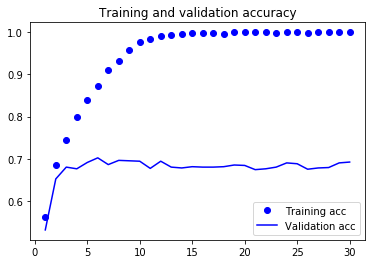

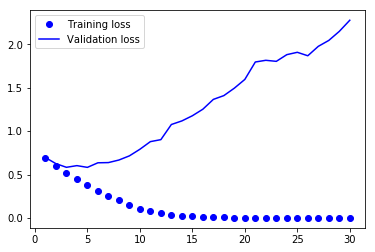

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()

plt.show()